**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Loading Dataset**

In [2]:
#column name to represent the data
#https://www.kaggle.com/uciml/pima-indians-diabetes-database
column_name = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# loading dataset
df = pd.read_csv("G:\\05\\diabetes.csv",header=None, names=column_name)
df=df.drop([0])

In [3]:
#sample data
df.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1
10,8,125,96,0,0,0,0.232,54,1


**Data Preparation**

In [4]:
#data preparation - converting datatype to numeric
for col in column_name:
    df[col] = pd.to_numeric(df[col])

In [5]:
#defining input and output data
x = df[column_name[1]]  #input  - glucose level
y = df[column_name[-1]] #output - patient is diabetic or not

**Data Splitting**

In [6]:
#splitting dataset into test and train data in 2:8 ratio
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

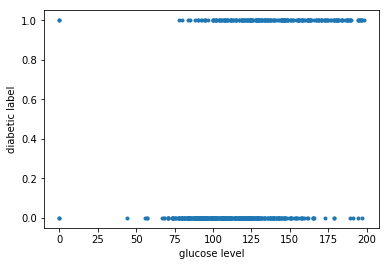

In [7]:
#before transformation of x_train
plt.plot(x_train,y_train,'.')
plt.xlabel("glucose level")
plt.ylabel("diabetic label")
plt.show()

**Pearson Colleration Co-efficient**

In [8]:
#pearson colleration co-efficient calculation
cov = np.cov(x_train.T, y_train) #finding covarience between x_train and y_train
std_x = np.std(x_train) #finding standard deviaton of x_train
std_y = np.std(y_train) #finding standard deviaton of y_train
pearson_coefficient = cov / (std_x * std_y) #pearson co-efficient
x_train = pow(x_train, (pearson_coefficient[0,1])) #transforming x_train

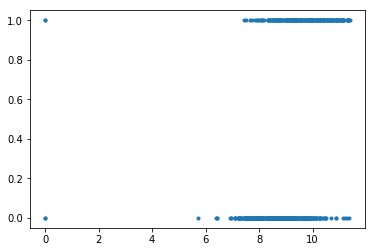

In [9]:
#after tranformation of x_train
plt.plot(x_train,y_train,'.')

plt.show()

**supporting methods**

In [10]:

#hypothesis function: predict model
def predict(x_train, w, b):
    z = np.dot(x_train, w) + b #finding z
    y_pred = 1 / (1 + np.exp(-z)) #prediction
    return y_pred

**Logistic Regression Model**

In [11]:
def train_model(x_train, y_train):

    x_train = x_train - x_train.mean() #normalizing x_train
    w, b = 0,0 #initialize w -> weight and b -> bias
    iterations = 3000 #no.of iterations
    LR = 0.01 #learning rate

    for itr in range(iterations):
        y_pred = predict(x_train, w, b) #predict output for x_train
        Derivative_w = (np.dot(x_train.T, ((y_pred - y_train).T))) / x_train.shape[0] #derivative weight
        Derivative_b = np.sum(y_pred - y_train) / x_train.shape[0]  #derivative bias
        w = w - LR * Derivative_w #update weight
        b = b - LR * Derivative_b #update bias
    
    return w, b


**Prediction**

In [12]:
#training the model
w, b = train_model(x_train, y_train)

x_test_norm =(x_test - x_test.mean())#normalize x_test
y_p = predict(x_test_norm, w, b) #predict output for x_test
yy = predict(np.sort(x_test_norm), w, b) #predict output for x_test
y_pred = [1 if pred >= 0.5 else 0 for pred in y_p] #convert y_pred as binary data (0 or 1)


**Visualization**

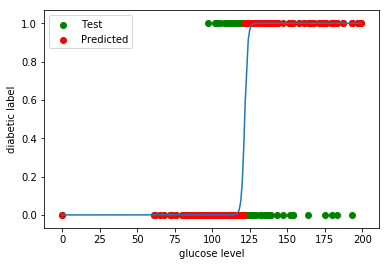

In [13]:
#output representation
plt.clf()
plt.scatter(x_test, y_test, c="green", label="Test")
plt.scatter(x_test, y_pred, c="red",label="Predicted")
plt.plot(np.sort(x_test), yy)
plt.xlabel("glucose level")
plt.ylabel("diabetic label")
plt.legend()
plt.show()

**Accuracy**

In [14]:
#to get accuracy of the model
accuracy=1 - np.mean(np.abs(y_pred - y_test))
print("Test accuracy: {0:.4f} %".format(accuracy*100))

Test accuracy: 70.7792 %


**Output File**

In [15]:
#create a new file with prediction data
def get_report():
    file = open("output.txt", "w+")
    for test,pred in zip(x_test, y_pred):
        file.write("prediction for glucose level "+str(test)+" -- "+str(pred)+"\n")
    file.close()

#getting report
get_report()
    